In [3]:
'''

from chain_mdp import ChainMDP
from agent_chainMDP import agent
# recieve 1 at rightmost stae and recieve small reward at leftmost state
env = ChainMDP(10)
s = env.reset()


""" Your agent"""
agent = agent(env)

done = False
cum_reward = 0.0
# always move right left: 0, right: 1
action = 1
while not done:    
    action = agent.action()
    ns, reward, done, _ = env.step(action)
    cum_reward += reward
print(f"total reward: {cum_reward}")


'''



'\n\nfrom chain_mdp import ChainMDP\nfrom agent_chainMDP import agent\n# recieve 1 at rightmost stae and recieve small reward at leftmost state\nenv = ChainMDP(10)\ns = env.reset()\n\n\n""" Your agent"""\nagent = agent(env)\n\ndone = False\ncum_reward = 0.0\n# always move right left: 0, right: 1\naction = 1\nwhile not done:    \n    action = agent.action()\n    ns, reward, done, _ = env.step(action)\n    cum_reward += reward\nprint(f"total reward: {cum_reward}")\n\n\n'

In [7]:
from models import dqn
import tensorflow as tf
from tensorflow import keras

from collections import deque
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


episodes = 3000  # number of episodes to run
initialize = 500  # initial time steps before start updating

from chain_mdp import ChainMDP
from agent_chainMDP import agent
# recieve 1 at rightmost stae and recieve small reward at leftmost state
env = ChainMDP(10)
agent = agent(env)
s = env.reset()

rrecord = []
totalstep = 0
for ite in range(episodes):
    obs = env.reset()
    done = False
    rsum = 0
    while not done:
        totalstep +=1
        action = agent.action(obs)

        next_obs,reward,done,info = env.step(action)
        rsum += reward
        experience = (obs,action,reward,next_obs,done)
        agent.buffer.append(experience)

        if totalstep>initialize:
            agent.train(totalstep)
        obs = next_obs
                        

################################################################################
    ## DO NOT CHANGE THIS PART!
    rrecord.append(rsum)
    if ite % 200 == 0:
        print('iteration {} ave reward {}'.format(ite, np.mean(rrecord[-10:])))
    
    ave100 = np.mean(rrecord[-100:])   
    if  ave100 > 17.5:
        print("Solved after %d episodes."%ite)
        break

iteration 0 ave reward 0.001
iteration 200 ave reward 0.0
iteration 400 ave reward 0.017000000000000008
iteration 600 ave reward 0.0
iteration 800 ave reward 0.0
iteration 1000 ave reward 0.0
iteration 1200 ave reward 0.017000000000000008
iteration 1400 ave reward 7.902500000000001
iteration 1600 ave reward 10.0
iteration 1800 ave reward 10.0
iteration 2000 ave reward 10.0
iteration 2200 ave reward 10.0
iteration 2400 ave reward 10.0
iteration 2600 ave reward 10.0
iteration 2800 ave reward 10.0


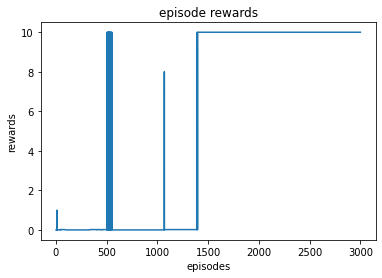

In [8]:
# plot [episode, reward] history
x = [i+1 for i in range(len(rrecord))]
plt.plot(x, rrecord)
plt.title('episode rewards')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()